<a href="https://colab.research.google.com/github/TobiasWinfriedWeber/DSAP_SER/blob/main/PlotRelevance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import basic libraries
import matplotlib.pyplot as plt
import numpy as np
# Mount to drive
from google.colab import drive
drive.flush_and_unmount()
drive.mount("/content/drive")
# Import torch
import torch
import torch.nn as nn
import torch.optim as optim
import os
from scipy.io import wavfile
import shutil
import csv
path = "/content/drive" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)
import os
import shutil
import random
import librosa


Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
class SimpleFCNN(nn.Module):
    def __init__(self, input_size, hidden_neurons):
        super(SimpleFCNN, self).__init__()

        # Fully connected (linear) layer
        self.fc1 = nn.Linear(input_size, hidden_neurons)
        # ReLU activation function for hidden layer
        self.relu = nn.ReLU()
        # Output layer
        self.output_layer = nn.Linear(hidden_neurons, 2)  # Two output classes

    def forward(self, x):
        # Flatten for fully connected layer
        x = x.view(x.size(0), -1)
        # Fully connected layer
        x = self.fc1(x)
        x = self.relu(x)
        # Output layer
        x = self.output_layer(x)
        x = nn.functional.softmax(x, dim=1)  # Apply softmax activation

        return x
model = SimpleFCNN(input_size = 47788, hidden_neurons=64)

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("We are using the following device for learning:",device)

We are using the following device for learning: cpu


In [4]:
from torch.autograd import Variable
import seaborn as sns
def plot_predictive_relevance(model, input_data, label, name):
    model.eval()

    # Convert input_data to a PyTorch Variable
    input_data = Variable(torch.Tensor(input_data).unsqueeze(0), requires_grad=True)

    # Forward pass
    output = model(input_data)

    # Get the output corresponding to the correct label
    target_output = output[0, label]

    # Backward pass to compute gradients
    target_output.backward()

    # Get the absolute values of the gradients
    gradients = input_data.grad.abs().squeeze().detach().numpy()
    #print(gradients)
    # Plot the predictive relevance heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(gradients, cmap="viridis", xticklabels=200, yticklabels=1)
    plt.title(f'Predictive Relevance Heatmap for MFCC Coefficients (Label: {label})')
    plt.xlabel('Time Frame')
    plt.ylabel('MFCC Coefficient Index')
    #plt.show()
    plt.tight_layout()
    #plt.savefig(name)
    #plt.close()
    # Plot the predictive relevance
    #plt.figure(figsize=(10, 6))
    #plt.plot(gradients, marker='o', linestyle='-', color='b')
    #plt.title(f'Predictive Relevance for MFCC Coefficients (Label: {label})')
    #plt.xlabel('MFCC Coefficient Index')
    #plt.ylabel('Predictive Relevance')
    #plt.show()
# test


22050


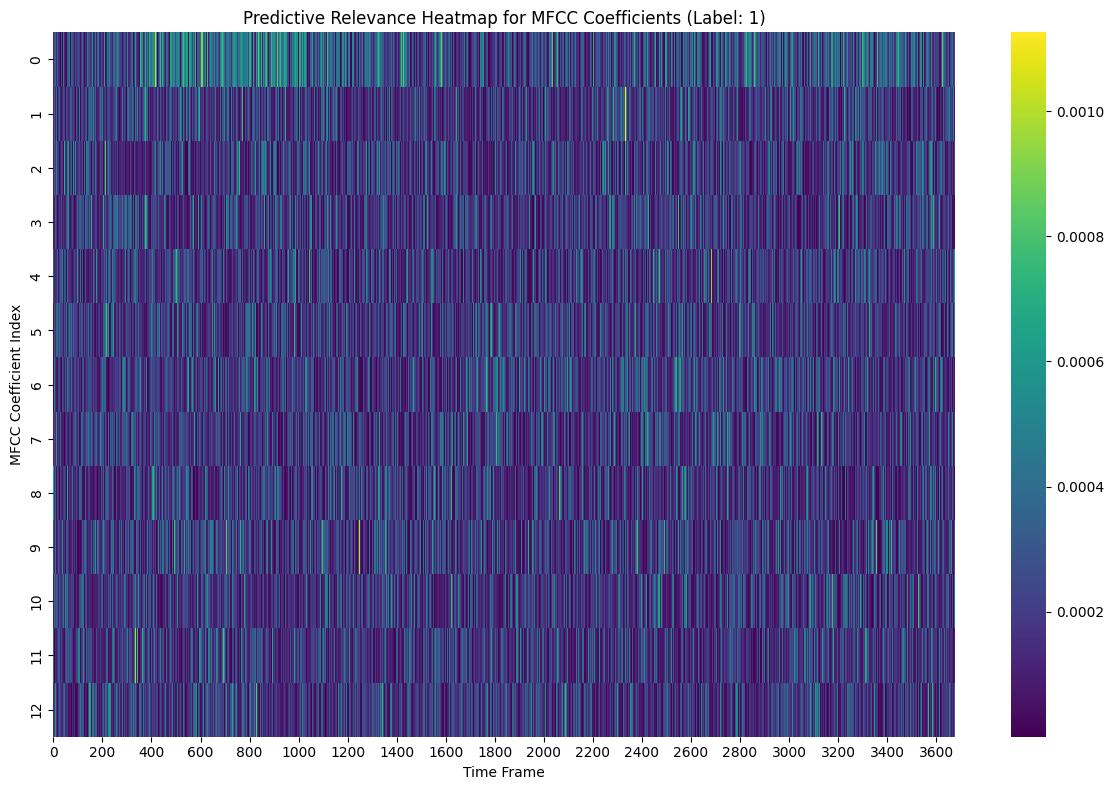

In [5]:
## Relevance Angry
model.load_state_dict(torch.load('/content/drive/My Drive/mfcc_ANN_repeated_ang/CNN_PAPER.pth', map_location=torch.device('cpu')))
file_name =  "/content/drive/My Drive/DSAP/BigProject/DATA/CremaD/ANG_SAMEPROP_REP/1034_IEO_ANG_HI.wav"
#waveform, sample_rate = torchaudio.load(file_name)
waveform, sample_rate = librosa.load(file_name)
print(sample_rate)
# Extract MFCC features
mfcc = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13, win_length = 400, n_fft=512, hop_length=30)
mfcc_normalized = 2 * ((mfcc - mfcc.min()) / (mfcc.max() - mfcc.min())) - 1

plot_predictive_relevance(model, mfcc_normalized, 1,"/content/drive/My Drive/RelevanceAngry.jpg")

22050


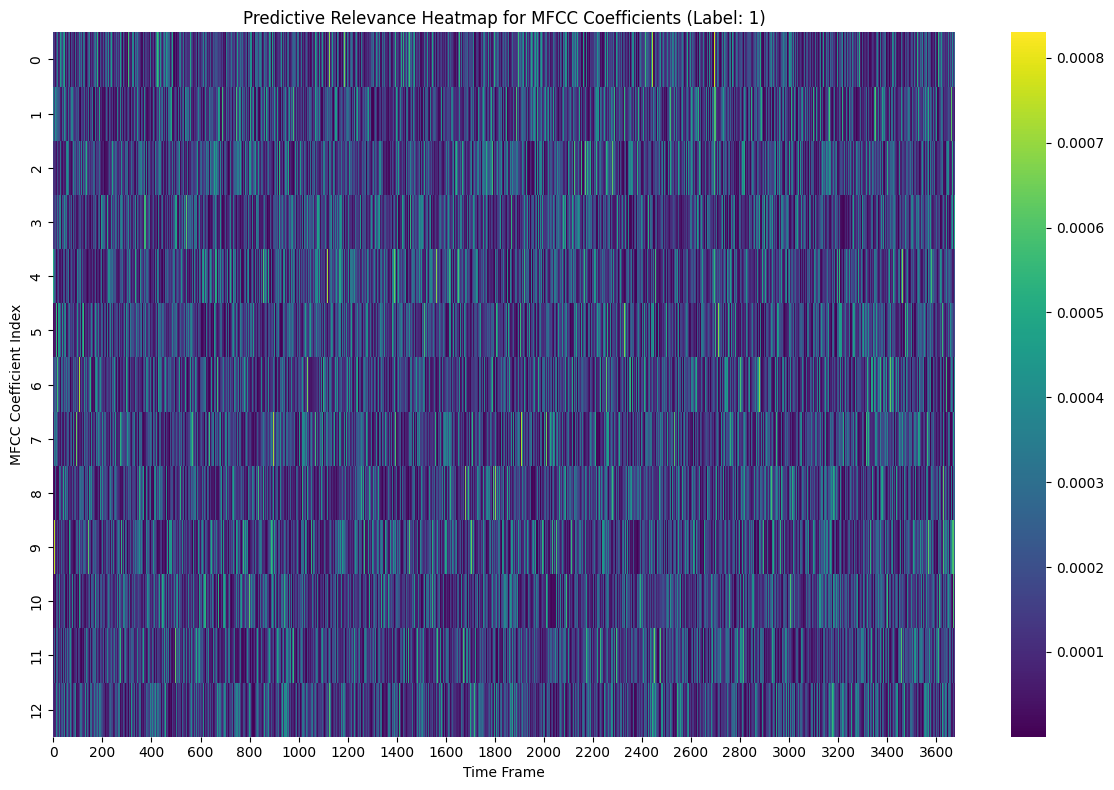

In [6]:
## Relevance HAP
model.load_state_dict(torch.load('/content/drive/My Drive/mfcc_ANN_repeated_hap/CNN_PAPER.pth', map_location=torch.device('cpu')))
file_name =  "/content/drive/My Drive/DSAP/BigProject/DATA/CremaD/HAP_SAMEPROP_REP/1051_IEO_HAP_HI.wav"
#waveform, sample_rate = torchaudio.load(file_name)
waveform, sample_rate = librosa.load(file_name)
print(sample_rate)
# Extract MFCC features
mfcc = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13, win_length = 400, n_fft=512, hop_length=30)
mfcc_normalized = 2 * ((mfcc - mfcc.min()) / (mfcc.max() - mfcc.min())) - 1

plot_predictive_relevance(model, mfcc_normalized, 1,"/content/drive/My Drive/RelevanceHappy.jpg")

22050


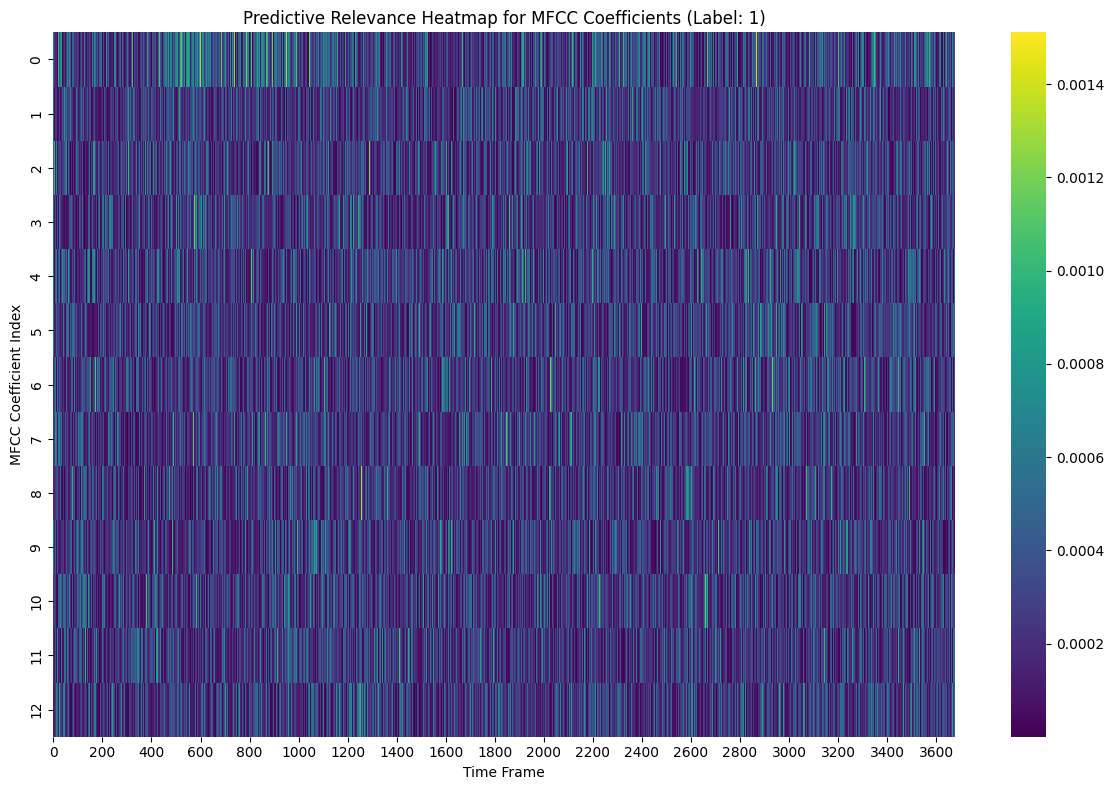

In [11]:
## Relevance Sad
# Here the relevance is also high for c0 but we listened to this snippet and it does not sound sad at all
model.load_state_dict(torch.load('/content/drive/My Drive/mfcc_ANN_repeated_sad/CNN_PAPER.pth', map_location=torch.device('cpu')))
file_name =  "/content/drive/My Drive/DSAP/BigProject/DATA/CremaD/SAD_SAMEPROP_REP/1031_IEO_SAD_HI.wav"
#waveform, sample_rate = torchaudio.load(file_name)
waveform, sample_rate = librosa.load(file_name)
print(sample_rate)
# Extract MFCC features
mfcc = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13, win_length = 400, n_fft=512, hop_length=30)
mfcc_normalized = 2 * ((mfcc - mfcc.min()) / (mfcc.max() - mfcc.min())) - 1

plot_predictive_relevance(model, mfcc_normalized, 1,"/content/drive/My Drive/RelevanceSad.jpg")